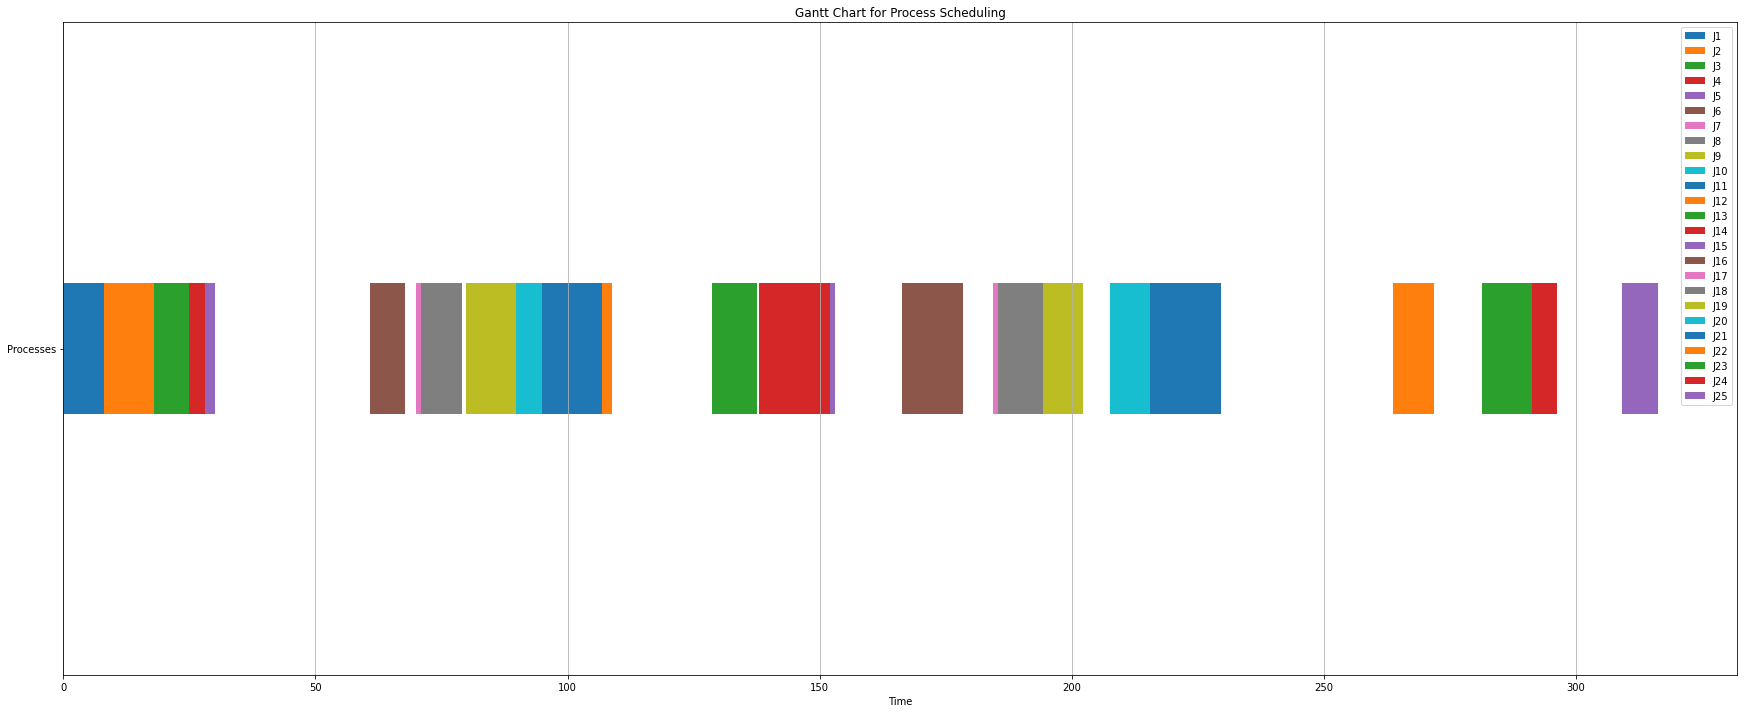

In [21]:
import matplotlib.pyplot as plt

# Function to parse the input file and extract job details
def parse_input_file(file_path):
    job_data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.split()
            if len(parts) == 3:  # Check if it's a job description line
                job_id = parts[0]
                start_time = float(parts[1])
                end_time = float(parts[2])
                job_data.append((job_id, start_time, end_time))
    return job_data

# Create a Gantt chart with unique colors and a legend for processes
def create_gantt_chart(job_data):
    fig, ax = plt.subplots(figsize=(30, 12))

    # Set the y-axis limits and labels
    ax.set_ylim(0, 1)
    ax.set_yticks([0.5])
    ax.set_yticklabels(["Processes"])

    # Create a dictionary to map process IDs to unique colors
    process_colors = {}
    unique_labels = set()

    # Plot the scheduling intervals
    for i, (job_id, start_time, end_time) in enumerate(job_data):
        if job_id not in process_colors:
            # Assign a unique color to the process if it's appearing for the first time
            process_colors[job_id] = f'C{i % 10}'  # Use different colors for each process
        color = process_colors[job_id]

        # Plot the process on the timeline
        width = end_time - start_time
        ax.barh(0.5,width, left=start_time, height=0.2, align='center', color=color)
        
        if job_id not in unique_labels:
            unique_labels.add(job_id)
            ax.barh(0,0,color=color,label=job_id)

    # Customize the plot
    ax.set_xlabel("Time")
    ax.set_title("Gantt Chart for Process Scheduling")
    
    # Create a legend with unique process labels
    ax.legend(loc='upper right')

    # Display the Gantt chart
    plt.grid(axis='x')
    plt.show()

# Main function
if __name__ == "__main__":
    input_file = "gantt_out.txt"  # Replace with the actual file path
    job_data = parse_input_file(input_file)
    create_gantt_chart(job_data)
